<a href="https://colab.research.google.com/github/fundamentals-of-data-science/course-materials/blob/master/problem_sets/Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Problem Set 1

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

**Do not delete or otherwise change the formatting, order, text of the questions**

---
---
## Question 1 - Bayes Rule

**Part 1**

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

If we let H be some condition, characteristic, hypothesis and D be some data, evidence, a test result), then how do we interpret each of the following in Bayes Rule: $P(H)$, $P(D)$, $P(H|D)$, $P(D|H)$, $P(H, D)$?


 - **$P(H)$**: The "prior" distribution. This is what we believe about the probabilities of events/distribution
 - **$P(D)$**: The probability of the data
 - **$P(H|D)$**: The "posterior distribution". How likely a particular hypothesis is after receiving new data
 - **$P(D|H)$**: The probability of some data given the hypothesis; also called the "likelihood"
 - **$P(H,D)$**: The probability of a hypothesis *and* an outcome

---
**Part 2.** 

There is a genetic condition that affects 2.3% of the population, C = {c, ~c}. If someone has the condition, the test (T) can detect that fact accurately 72.1% of the time (true positive rate). However, the test (T) also returns a positive response in 20.3% of the cases where the someone does not have the condition (false positive rate), T={pos, neg}.

**DO NOT CHANGE THE NOTATION**

1. If we want to know `P(C|T)`, write out Bayes Rule for this problem:

$$P(C|T) = \frac{P(T|C) * P(C)}{P(T)}$$

2. Using the values supplied in the description of the problem, specify all priors and likelihoods for the version of Bayes Rule you just wrote out. Calculating the missing values.

The priors are $P(C)$, and the likelihoods are $P(T|C)$. Let's create a table of our knowledge so far

|       | $c$  |$\neg c$|$P(T)$|
|----:  |:----:|:-----: |----  |
| $pos$ | |  ||
| $neg$ | |  ||
|$P(C)$ | 0.023| 0.977  |   |

$$
\begin{aligned}
P(pos|c) &= 0.721 \\
&= \frac{P(pos,c)}{P(c)} \\
P(pos,c) &= (0.721)(0.023) \\
P(pos,c) &= 0.016583
\end{aligned}
$$

And
$$
\begin{aligned}
P(pos|\neg c) &= 0.203 \\
&= \frac{P(pos,\neg c)}{P(\neg c)} \\
P(pos,\neg c) &= (0.203)(0.977) \\
P(pos,\neg c) &= 0.198331
\end{aligned}
$$

In [2]:
import numpy as np

In [3]:
c = 0.023
pC = np.array([c, 1 - c])
pC

array([0.023, 0.977])

$$ \fbox{$P(C) = \begin{bmatrix}c & \neg c\end{bmatrix} = \begin{bmatrix}0.023 & 0.977\end{bmatrix}$} $$

In [4]:
ppos_given_c = 0.721
ppos_given_notc = 0.203
pCpos = np.array([ppos_given_c, ppos_given_notc]) * pC
pCpos

array([0.016583, 0.198331])

In [5]:
pCneg = pC - pCpos
pCneg

array([0.006417, 0.778669])

This gives us our final $P(C,T)$

In [6]:
pCT = np.vstack((pCpos, pCneg))
pCT

array([[0.016583, 0.198331],
       [0.006417, 0.778669]])

In [7]:
from tabulate import tabulate

In [8]:
tabulate(pCT, tablefmt="html", floatfmt=".3f")

0.017,0.198
0.006,0.779


And also $P(T)$

In [9]:
pT = np.sum(pCT, axis=1)
pT

array([0.214914, 0.785086])

$$ P(T|C) = \frac{P(C,T)}{P(C)} $$

In [10]:
pT_given_C = pCT / pC
tabulate(pT_given_C, tablefmt="html", floatfmt="0.3f")

0.721,0.203
0.279,0.797


With $C$ being the columns and $T$ being the rows
$$ \fbox{$P(T|C) = \begin{bmatrix}
0.721 & 0.203 \\
0.279 & 0.797 \\
\end{bmatrix} $} $$

---
3. Calculate `P(C|T)`.

As shown above
$$
\begin{aligned}
P(C|T) &= \frac{P(T|C) * P(C)}{P(T)} \\
&= \frac{\begin{bmatrix}
0.721 & 0.203 \\
0.279 & 0.797 \\
\end{bmatrix} \begin{bmatrix}0.023 & 0.977\end{bmatrix}}{\begin{bmatrix}0.214914 & 0.785086\end{bmatrix}}
\end{aligned}
$$

In [11]:
pC_given_T = pT_given_C * pC / pT
tabulate(pC_given_T, tablefmt="html", floatfmt="0.3f")

0.077,0.253
0.030,0.992


$$ \fbox{$\begin{aligned}
P(C|T) &= \begin{bmatrix}
0.077 & 0.253 \\
0.030 & 0.992 \\
\end{bmatrix}
\end{aligned}$} $$

---
4. Please explain each individual probability in words and the difference between the prior and the posterior and the reason for the difference.

 - **$P(C)$**: The "prior" distribution. In this case, the prior is what we believe is the underlying rate of the genetic condition in the general population
 - **$P(T)$**: The probability of the data. In this case, it is the probability of getting a positive or negative test result
 - **$P(C|T)$**: The "posterior distribution". In this case, this is our updated belief on the underlying rate of the condition based on the result of a test. Unless we are only starting to collect data on the genetic condition, the update to our belief of the rate is unlikely to change much from the result of a single test.
 - **$P(T|C)$**: The "likelihood". In this case, this is the probability the test returns a given result, given that someone either has or does not have the condition.
 - **$P(C,T)$**: In this case, this is the probability of a given test result *and* having or not having the condition
 
In this case, the numerical difference between the prior and the posterior is unlikely to be large for a single test. If many tests were conducted at once, and a new posterior calculated based off of that, a larger numerical difference might be seen. 

---
**Part 3.** 

Re-calculate #2-4 (including discussion) but assume a new test has a true positive rate is 97.3% but the false positive rate is 37.2%.


**The priors, $P(C)$, will not change when we change the test**. The likelihoods however, will change. 

In [12]:
ppos_given_c = 0.973
ppos_given_notc = 0.372
pCpos = np.array([ppos_given_c, ppos_given_notc]) * pC
pCpos

array([0.022379, 0.363444])

In [13]:
pCneg = pC - pCpos
pCneg

array([0.000621, 0.613556])

In [14]:
pCT = np.vstack((pCpos, pCneg))
pCT

array([[0.022379, 0.363444],
       [0.000621, 0.613556]])

In [15]:
pT_given_C = pCT / pC
pT_given_C

array([[0.973, 0.372],
       [0.027, 0.628]])

Where $C$ is the columns, and $T$ is the rows
$$ \fbox{$P(T|C) = \begin{bmatrix} 0.973 & 0.372 \\ 0.027 & 0.628 \end{bmatrix}$} $$

Now to calculate
$$ P(C|T) = \frac{P(T|C)P(C)}{P(T)} $$

In [16]:
pC_given_T = pT_given_C * pC / pT
pC_given_T

array([[0.10413002, 0.46293527],
       [0.00288953, 0.78151438]])

$$ \fbox{$P(C|T) = \begin{bmatrix} 0.10413002 & 0.46293527 \\ 0.00288953 & 0.78151438 \end{bmatrix}$} $$

 - **$P(C)$**: The "prior" distribution. In this case, the prior is what we believe is the underlying rate of the genetic condition in the general population. It did not change when we changed the medical test. 
 - **$P(T|C)$**: The "likelihood". Because we changed the test, the likelihoods have changed. We are told that the test has a true positive rate of 97.3%, and a false positive rate of 37.2%. In turn, this means that the test incorrectly returns a negative 2.7% of the time, and a correct negative 62.8% of the time. 
 - **$P(C,T)$**: In this case, this is the probability of a given test result *and* having or not having the condition

---
---
## Question 2 - 1994 Adult Census Data - Empirical Probability

For this question, you will answer queries in conditional probability as was done with the Titanic Data.
Because we have not had Exploratory Data Analysis yet, we will not ask you to explore the data "in general".
Instead, *for each calculation, you should examine the variables involved individually, looking to see if they have missing values, what their values look like (most of the data is categorical), and to see if any transformations are in order.*

You may use code from the Titanic Case Study as you see fit. Add any other imports you need.

To reiterate, for each calculation:

1. Look at the values and counts/percentages for each variable (unless it's been done before). That is, look at the marginal probabilities.
2. Before each calculation, write down a hypothesis about what you expect to see. For example, if you are about to calculate a conditional probability distribution, what do you expect the distribution to look like?
3. Make the calculation.
4. Discuss what the results show, relative to your hypothesis.

In [17]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

Load the data:

In [18]:
income = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                     header=None, 
                     error_bad_lines=False)

The data doesn't come with any headers or other information:

In [19]:
income.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 20.2 MB


Looking at the first rows, we can get a general idea of the data:

In [20]:
income.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Let's add some column headers:

In [21]:
columns = ["age", "class", "fnlwght", "education", "education_years", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "agi"]

In [22]:
income.columns = columns

In [23]:
income.head()

,age,class,fnlwght,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,agi
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Conditional Probabilities

You *will* need more cells for your answer. Add them as you need them. There are already the 3 default cells there for you. You will need more.

1. $P(agi|age)$

Before an hypothesis is made, an examination of the marginal distributions will be made.

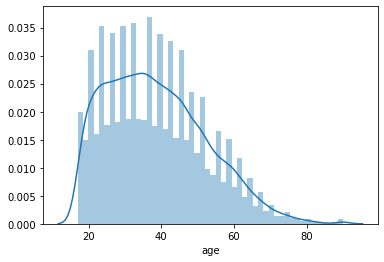

In [24]:
sns.distplot(income.age)

From this plot, we can see the general distribution of ages: the youngest starts at 17, with the peak around 35 perhaps. Obviously people are not born at the age of 17 (and the plot hints that there should be a tail of some sort), but rather people under the age of 18 are not included in the census data.

Now let's examine the agi distribution

In [25]:
agi_dist = income.agi.value_counts().reset_index().rename(columns={"agi":"num_values", "index":"agi"})

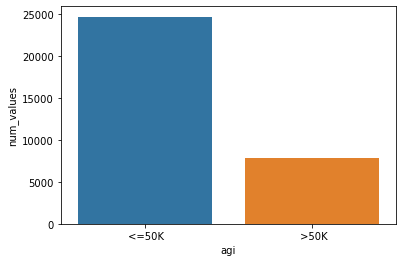

In [26]:
sns.barplot(data = agi_dist, x = "agi", y = "num_values")

In [27]:
agi_dist.num_values.iloc[0] / agi_dist.num_values.iloc[-1]

3.152659099604642

From this plot and calculation, about 3.15 times as many people have an AGI of <= 50k as >50k. Interestingly, this ratio is very close to $\pi$; coincidence or conspiracy? (Probably coincidence)

Before we calculate $P(agi|age)$, an hypothesis should be made. Our hypothesis is that AGI generally starts out below 50k, and increases with age, until retirement, at which point it generally decreases.

In [28]:
N = len(income)

# Calculate the joint probabilities, P(age, agi)
agi_and_age = (
    income
    .groupby("agi") # for each AGI group, do the following
    .age # select the age column
    .value_counts() # count the number of values of each unique age in that AGI bin
    .unstack("agi") # move AGI from the index to be the columns
    .fillna(0.0) # fill NaN with 0.0
    .div(N) # divide by population size
)
agi_and_age

agi,<=50K,>50K
age,,
17,0.012131,0.000000
18,0.016891,0.000000
19,0.021805,0.000061
20,0.023126,0.000000
21,0.022020,0.000092
...,...,...
85,0.000092,0.000000
86,0.000031,0.000000
87,0.000031,0.000000


Now that we have the joint probabilities, let's calculate $P(agi|age) = \frac{P(agi,age)}{P(age)}$

In [29]:
p_age = np.sum(agi_and_age.values, axis=1).reshape((-1,1))
p_agi_given_age = agi_and_age / p_age
# p_agi_given_age = p_agi_given_age.stack().rename("prob").reset_index()
p_agi_given_age

agi,<=50K,>50K
age,,
17,1.000000,0.000000
18,1.000000,0.000000
19,0.997191,0.002809
20,1.000000,0.000000
21,0.995833,0.004167
...,...,...
85,1.000000,0.000000
86,1.000000,0.000000
87,1.000000,0.000000


In [30]:
# fig, ax = plt.subplots(figsize=(20, 10))
# ax = sns.barplot(ax = ax, data = p_agi_given_age, x = "age", y = "prob", hue = "agi")

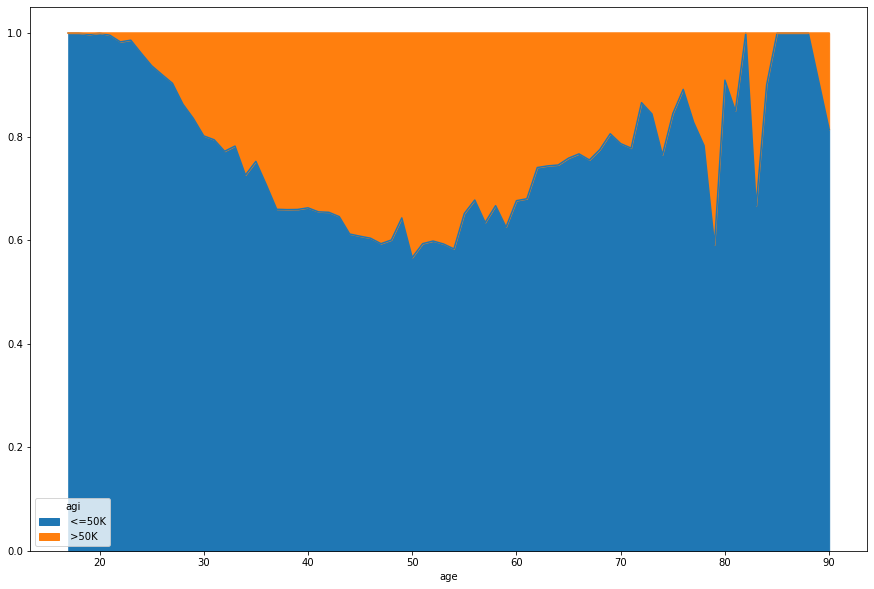

In [31]:
p_agi_given_age.reset_index().plot.area(x = "age", figsize = (15,10))

This is somewhat close to the hypothesis: AGI starts out below 50k, and increases with age till retirement, at which point it starts decreasing. The plot seems to indicate that the peak is around the age of 50. Whether this is in fact the average retirement age cannot be figured out from this data. There are some notable anomalies in the general trend as age increases.

---
2. $P(agi|occupation)$

We have already examined the distribution of AGI, but not occupation. Let's examine that now

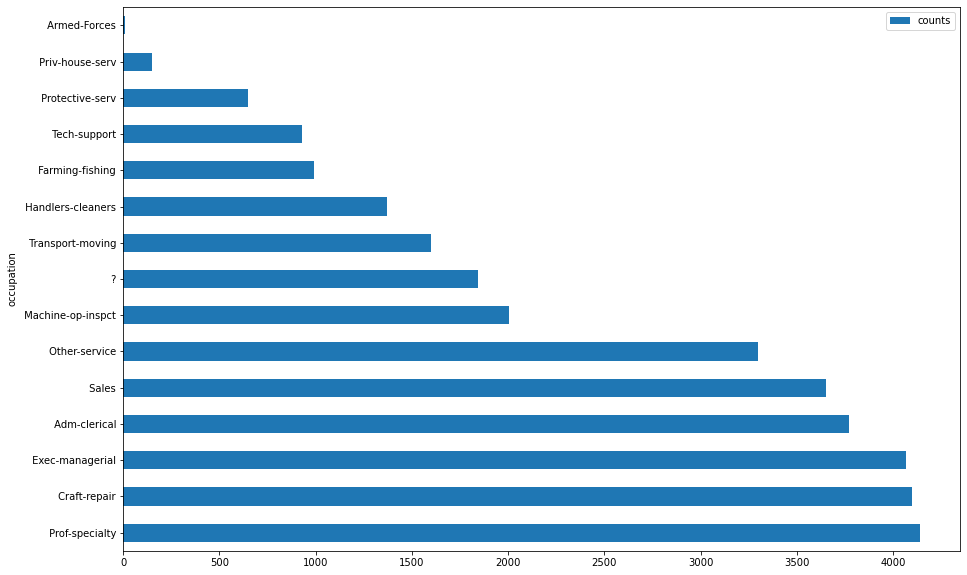

In [32]:
(
    income
    .occupation # grab the occupation col
    .value_counts() # count how many of each unqique occupation
    .reset_index() # make occupation a normal column again (no longer the index)
    .rename(columns = {"occupation":"counts", "index":"occupation"}) # give more useful names
    .plot # plot
    .barh(x = "occupation", figsize = (15, 10)) # occupations on the x
)

There are a total of 15 occupational categories counted, with the shown total numbers of each.

Our hypothesis for $P(agi|occupation)$ is that AGI is greatest in the categories
 - Exec-managerial
 - Prof-specialty

and is lowest in the categories
 - Priv-house-serv
 - Handlers-cleaners

In [33]:
# Since we'll be doing the calculation P(A|B) many times, let's create a function for it
def cond_prob(df: pd.DataFrame, A: str, B: str) -> pd.DataFrame:
    N = len(df)

    # Calculate the joint probabilities, P(age, agi)
    joint_probs = (
        df
        .groupby(A)[B] # for each A group, do the following: grab the B column
        .value_counts() # count the number of values of each unique age in that AGI bin
        .unstack(A) # move AGI from the index to be the columns
        .fillna(0.0) # fill NaN with 0.0
        .div(N) # divide by population size
    )
    
    p_B = np.sum(joint_probs.values, axis=1).reshape((-1,1))
    return joint_probs / p_B

In [34]:
p_agi_given_occupation = cond_prob(income, "agi", "occupation")
p_agi_given_occupation

agi,<=50K,>50K
occupation,,
?,0.896365,0.103635
Adm-clerical,0.865517,0.134483
Armed-Forces,0.888889,0.111111
Craft-repair,0.773359,0.226641
Exec-managerial,0.515986,0.484014
Farming-fishing,0.884306,0.115694
Handlers-cleaners,0.937226,0.062774
Machine-op-inspct,0.875125,0.124875
Other-service,0.958422,0.041578


In [35]:
# Might as well create a function for plotting the conditional probability as well
def plot_cond_prob(p_A_given_B: pd.DataFrame):
    # Get the name of the index column
    B = p_A_given_B.index.name
    
    # If the B column is numeric
    if p_A_given_B.index.is_numeric():
        return p_A_given_B.reset_index().plot.area(x = B, figsize = (15,10))
    # If categorical or string
    elif p_A_given_B.index.is_object() | p_A_given_B.index.is_categorical():
        # What is the name of the A column?
        temp = p_A_given_B.stack().rename("prob").reset_index()
        A_name = np.setdiff1d(temp.columns, [B, "prob"])[0]
        
        # Create the plot
        return p_A_given_B.stack().rename("prob").unstack(A_name).plot.barh(figsize = (15,10), stacked=True)

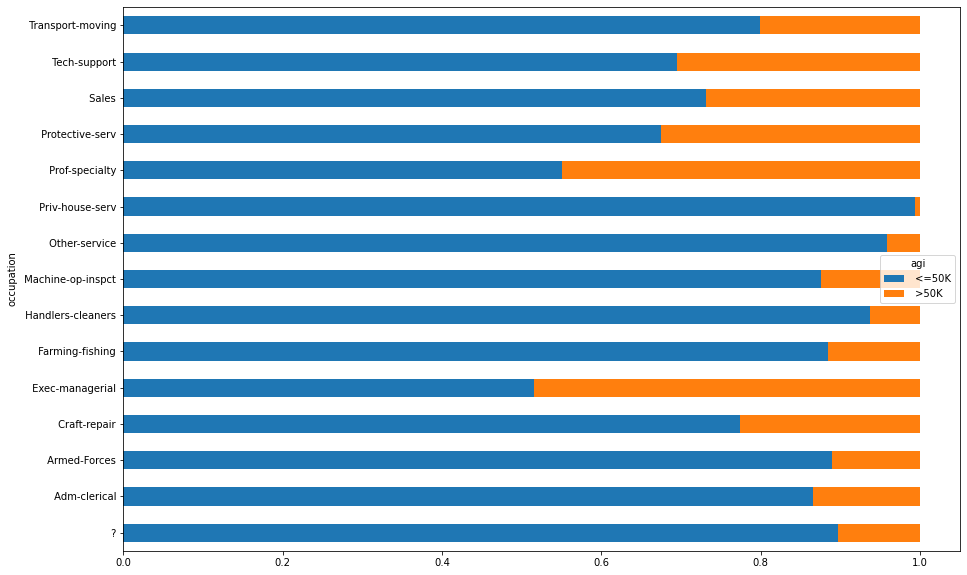

In [36]:
plot_cond_prob(p_agi_given_occupation)

From this plot, we can see that our hypothesis that `Prof-specialty` and `Exec-managerial` would have the highest AGI was correct. Our hypothesis that `Priv-house-serv` and `Handlers-cleaners` would be lowest was almost correct. In actuality, `Other-service` had a lower AGI than `Handlers-cleaners`.

3. $P(agi|sex)$

We have not yet investigated the marginal distribution of `sex`

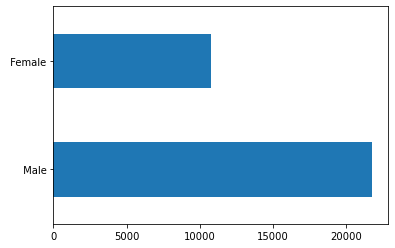

In [37]:
income.sex.value_counts().plot.barh()

In [38]:
vcounts = income.sex.value_counts()
vcounts[0] / vcounts[1]

2.0230247887846997

As we can see, there were approximately twice as many male responders to the census as female.

Our hypothesis for $P(agi|sex)$ is that men will have a higher AGI than women.

In [39]:
p_agi_given_sex = cond_prob(income, "agi", "sex")
p_agi_given_sex

agi,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


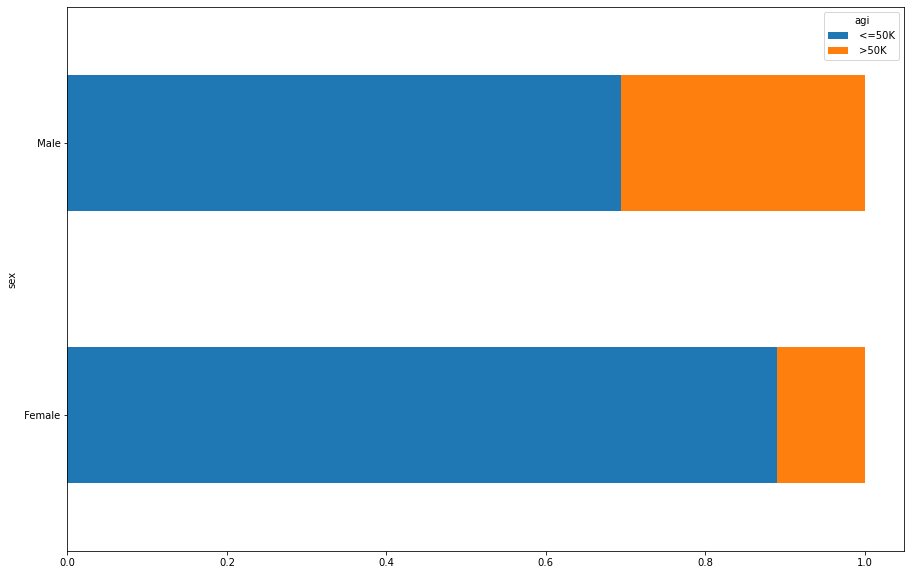

In [40]:
plot_cond_prob(p_agi_given_sex)

We can see that it is indeed the case that men have a higher AGI than women.

4. $P(agi|sex, occupation)$

We have already investigated the marginal distributions of all three features here. However, we will need to create the joint probability of sex and occupation. Since both columns are strings, we can create a joint column by simply concatenating sex and occupation together.

Our hypothesis is that in general, men in a given occupation will have a higher AGI than women.

In [41]:
income["occupation_sex"] = income.occupation + income.sex
p_agi_given_sexoccupation = cond_prob(income, "agi", "occupation_sex")
p_agi_given_sexoccupation

agi,<=50K,>50K
occupation_sex,,
? Female,0.938169,0.061831
? Male,0.861277,0.138723
Adm-clerical Female,0.916437,0.083563
Adm-clerical Male,0.760746,0.239254
Armed-Forces Male,0.888889,0.111111
Craft-repair Female,0.909910,0.090090
Craft-repair Male,0.765540,0.234460
Exec-managerial Female,0.758412,0.241588
Exec-managerial Male,0.419333,0.580667


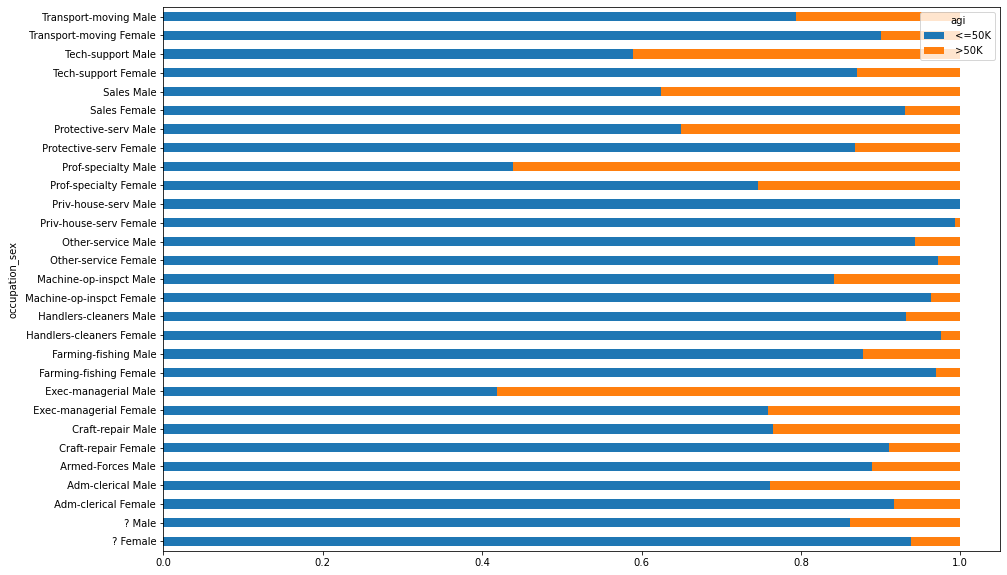

In [42]:
plot_cond_prob(p_agi_given_sexoccupation)

From the plot, we can see that men do indeed have a higher AGI in all occupations except `Priv-house-serv`.

5. $P(occupation|race)$

Let's examine the marginal distribution of race

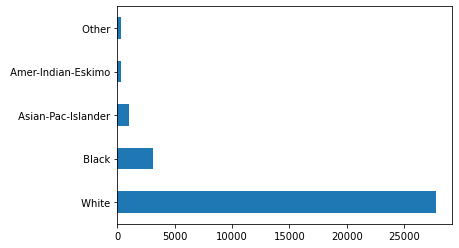

In [43]:
income.race.value_counts().plot.barh()

From this, we can clearly see that the majority of responses were from white people, all others forming a minority

Our hypothesis for the distribution $P(occupation|race)$ is that if you are white you are more likely to work in `Prof-specialty` and `Exec-managerial`, and less likely to do so if you are not white.

In [44]:
p_occupation_given_race = cond_prob(income, "occupation", "race")
p_occupation_given_race

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
race,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,0.080386,0.099678,0.003215,0.141479,0.096463,0.032154,0.070740,0.061093,0.106109,0.000000,0.106109,0.025723,0.083601,0.012862,0.080386
Asian-Pac-Islander,0.062560,0.133782,0.000000,0.085659,0.129933,0.015399,0.022137,0.056785,0.123195,0.003850,0.179018,0.014437,0.103946,0.042348,0.026949
Black,0.068822,0.156850,0.000320,0.078105,0.078105,0.013444,0.057298,0.087708,0.182778,0.008963,0.076504,0.032650,0.081306,0.022727,0.054417
Other,0.084871,0.095941,0.000000,0.103321,0.040590,0.040590,0.044280,0.143911,0.147601,0.011070,0.114391,0.018450,0.092251,0.011070,0.051661
White,0.054465,0.110871,0.000252,0.132801,0.131076,0.032895,0.040768,0.057916,0.090703,0.004098,0.131255,0.018658,0.116372,0.028976,0.048893


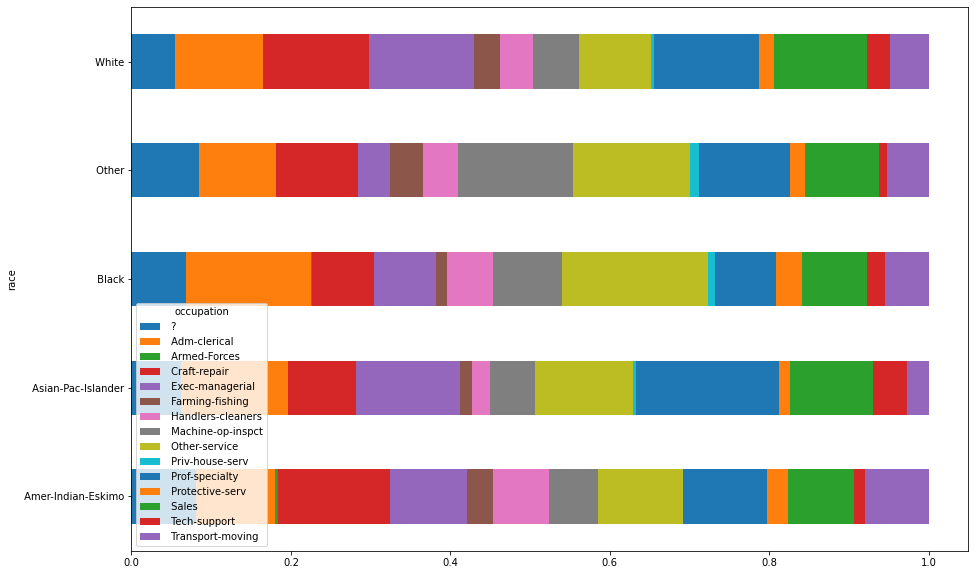

In [45]:
plot_cond_prob(p_occupation_given_race)

The plot shows that while `Prof-specialty` and `Exec-managerial` are among two of the most populous jobs for white people, `Craft-repair`, `Sales`, and `Protective-serv` are also relatively well populated.

The other part of our hypothesis is less correct. Indeed, `Prof-specialty` and `Exec-managerial` are two of the largest categories for Asian and Pacific Islanders.

## Naive Bayes Classifier

Build a Naive Bayes Classifier $P(agi|age, sex, race, occupation, education\_years)$. Make 5 predictions with it, after first making a hypothesis about the prediction. Import what you need.

In [46]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

Our hypothesis is that AGI will be greater for:
 - people around age 50
 - men
 - white people
 - Executives and professionals
 - people with more years of education
 
However, we have not yet looked at `education_years` yet. Let's do that

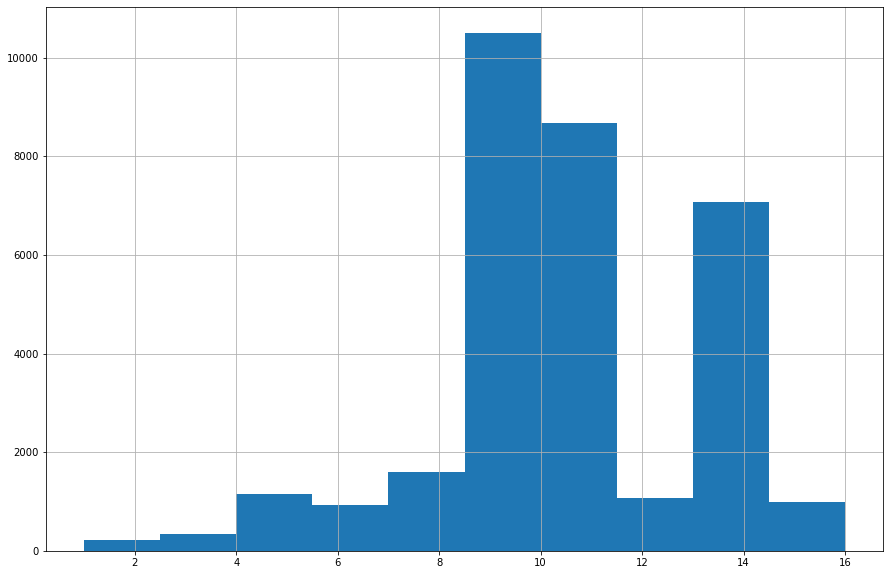

In [47]:
income.education_years.hist(figsize = (15,10))

In [48]:
income.education_years.value_counts().head()

9     10501
10     7291
13     5355
14     1723
11     1382
Name: education_years, dtype: int64

There are three clear peaks:
1. 9 ears
1. 10 years
1. 13 years

This suggests that most people finish high school and do not continue, or finish college and do not continue. It is also notable that there is a long tail to the left, suggesting that all throughout grade school and high school people are dropping out.

Because three of the five features (and what we wish to predict) are categorical, we'll use sklearn's `CategoricalNB`. Before we do that, many of the columns with strings have spaces at the front or end, so let's get rid of the extra spaces

In [49]:
# Grab the string columns
str_cols = {name:income[name] for name in income if income[name].dtype == 'object'}

# Strip each one
stripped_cols = {name: col.str.strip() for name, col in str_cols.items()}

# Put them back in the dataframe
for name, col in stripped_cols.items():
    income[name] = col

In [50]:
encoder = OrdinalEncoder()
encoder.fit(income[["age","race","sex","occupation","education_years"]])

OrdinalEncoder()

In [51]:
encoder.categories_

[array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 90]),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
        'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
        'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
        'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
        'Transport-moving'], dtype=object),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])]

Now to fit the Naive Bayes classifier

In [52]:
cnb = CategoricalNB()
cnb.fit(encoder.transform(income[["age","race","sex","occupation","education_years"]]), income.agi)
cnb.classes_

array(['<=50K', '>50K'], dtype='<U5')

If we have a 20 year old, black, female, working in `Handlers-cleaners`, with 10 years of education, hypothesis is that her AGI is < 50k

In [53]:
cnb.predict_proba(encoder.transform([(20, "Black", "Female", "Handlers-cleaners", 10)]))

array([[9.99964004e-01, 3.59959068e-05]])

While I am not sure what the labels are, I think we can safely say (unfortunately) than the first is <=50k and the second is >50k. If so, our hypothesis is correct

For a 50 year old, White, male, working in `Exec-managerial` with 14 years of education, hypothesis is that his AGI is >50k

In [54]:
cnb.predict_proba(encoder.transform([(50, "White", "Male", "Exec-managerial", 14)]))

array([[0.06962482, 0.93037518]])

The hypothesis was correct, there is a 93% chance that this person makes >50k

For a 30 year old, White, female, working in `Prof-specialty`, with 14 years of education, hypothesis is that her AGI is <=50k

In [55]:
cnb.predict_proba(encoder.transform([(30, "White", "Female", "Prof-specialty", 14)]))

array([[0.48693507, 0.51306493]])

As there is a 48.7% chance that this person will have an AGI <=50k, the hypothesis is incorrect.

For a 70 year old, American Indian/Eskimo, working in `Sales`, with 10 years of education, hypothesis is that his AGI is <=50k

In [56]:
cnb.predict_proba(encoder.transform([(70, "Amer-Indian-Eskimo", "Male", "Sales", 10)]))

array([[0.87637127, 0.12362873]])

Hypothesis is correct. 

Finally, a 35 year old, Asian/Pacific Islander, female, working in `Prof-specialty`, with 13 years of education, hypothesis is that her AGI is >50k

In [57]:
cnb.predict_proba(encoder.transform([(35, "Asian-Pac-Islander", "Female", "Prof-specialty", 13)]))

array([[0.54565997, 0.45434003]])

Hypothesis is incorrect; they only have a 45.4% of having an AGI over 50k